## Polynomial Regression 

Polynomial Linear regression is called Linear Regression because the fucntion is a linear combination of coefficients. A non linear regression would be something like a/b+c/de and so on.

#### Problem 

Given the employment history of an employee, predict if he's bluffind about his salary 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [12]:
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values
"""from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)"""
# Not doing this because of very small datset
# Always make sure X is a matrix

'from sklearn.model_selection import train_test_split\nX_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)'

In [13]:
# Just for comparison 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Now creating polyomial regression class 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
# Now we create a matrix which will contain powers of X upto what we want
X_poly= poly_reg.fit_transform(X)
pd.DataFrame(X_poly).head()

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0


In [29]:
# Now creating a polynomial Linear Regression 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

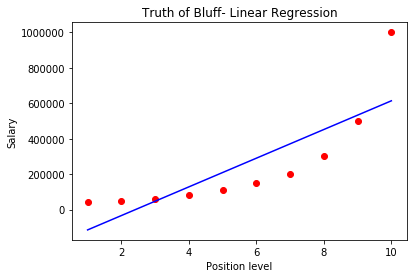

In [20]:
# Visualization of the result 
plt.scatter(X,Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title("Truth of Bluff- Linear Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

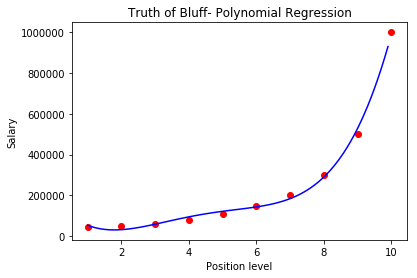

In [41]:
# Visualization of the result 
xgrid= np.arange(min(X),max(X), 0.1)
xgrid=xgrid.reshape((len(xgrid),1))
plt.scatter(X,Y, color='red')
plt.plot(xgrid, lin_reg2.predict(poly_reg.fit_transform(xgrid)), color='blue')
plt.title("Truth of Bluff- Polynomial Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [34]:
# The previous employee said that his salary was 160k 
lin_reg.predict(6.5)

array([330378.78787879])

In [35]:
lin_reg2.predict(poly_reg.fit_transform(6.5))
# It's just a linear model with polynomial features so we need to transform it

array([158862.45265153])